In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.path.dirname('__file__'), '..')))

In [2]:
from src.data_processing import DataProcessor, EDAReportGenerator

In [3]:
# Define paths
raw_data_path = "../data/raw/data.csv"  # Update with your actual path
processed_data_path = "../data/processed/processed_customer_data.csv"

In [4]:
# Initialize and run processing pipeline
processor = DataProcessor(raw_data_path)
rfm_df = processor.run_pipeline(processed_data_path)

# Display the processed RFM data
if rfm_df is not None:
    display(rfm_df.head(10))

Data loaded successfully from ../data/raw/data.csv. Shape: (95662, 16)
Starting data preprocessing...
TransactionStartTime converted and date extracted.
Calculating RFM features...
RFM features calculated.
Defining proxy default variable...
Proxy default variable defined.
Processed customer data saved to ../data/processed/processed_customer_data.csv


,CustomerId,Recency,Frequency,Monetary,Default
0,CustomerId_1,83,1,10000,0
1,CustomerId_10,83,1,10000,0
2,CustomerId_1001,89,5,30400,0
3,CustomerId_1002,25,11,4775,0
4,CustomerId_1003,11,6,32000,0
5,CustomerId_1004,52,1,2000,0
6,CustomerId_1005,46,9,61200,0
7,CustomerId_1006,64,1,1000,0
8,CustomerId_1007,81,1,28000,0
9,CustomerId_1008,65,2,20000,0


In [5]:
# Run EDA on the original dataset (not just RFM)
if processor.df is not None:
    eda = EDAReportGenerator(processor.df)


In [6]:
overview= eda.get_data_overview()
print(overview)

### 1. Overview of the Data
  - Number of Rows: 95662
  - Number of Columns: 17
  - Data Types:
TransactionId                        object
BatchId                              object
AccountId                            object
SubscriptionId                       object
CustomerId                           object
CurrencyCode                         object
CountryCode                           int64
ProviderId                           object
ProductId                            object
ProductCategory                      object
ChannelId                            object
Amount                              float64
Value                                 int64
TransactionStartTime    datetime64[ns, UTC]
PricingStrategy                       int64
FraudResult                           int64
transaction_date                     object



In [7]:
summary= eda.get_summary_statistics()
print(summary)


### 2. Summary Statistics (Numerical Features)
       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000



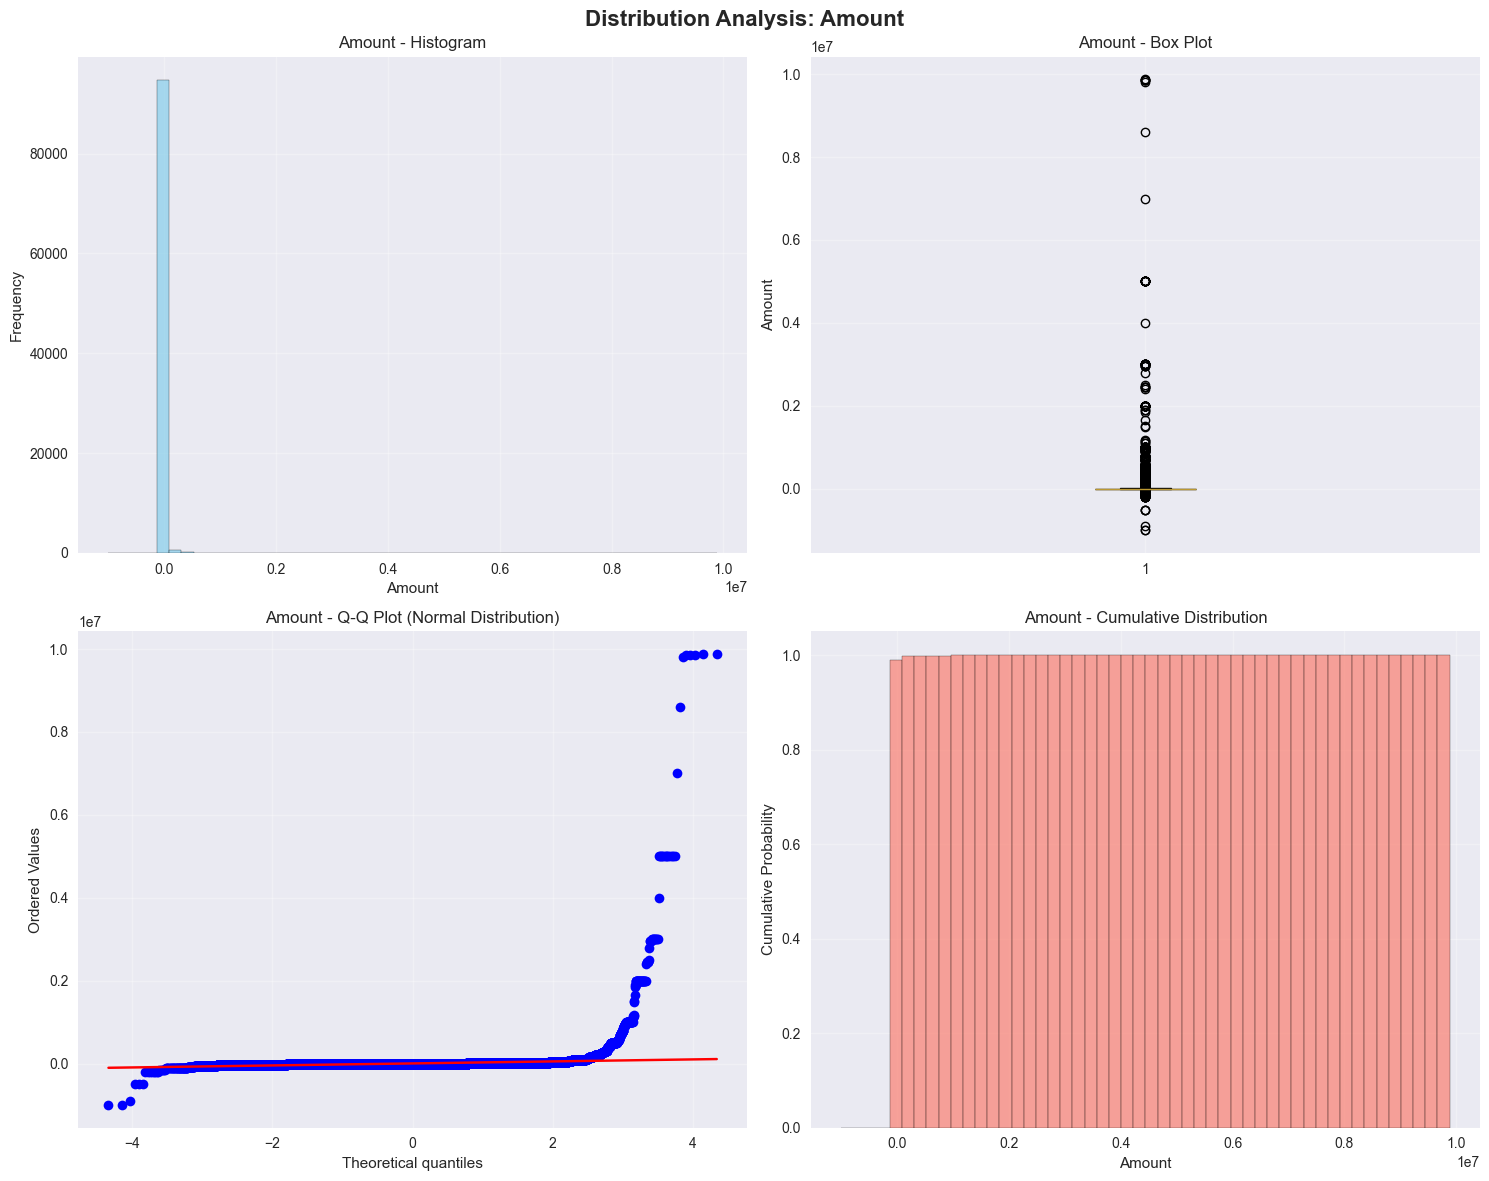

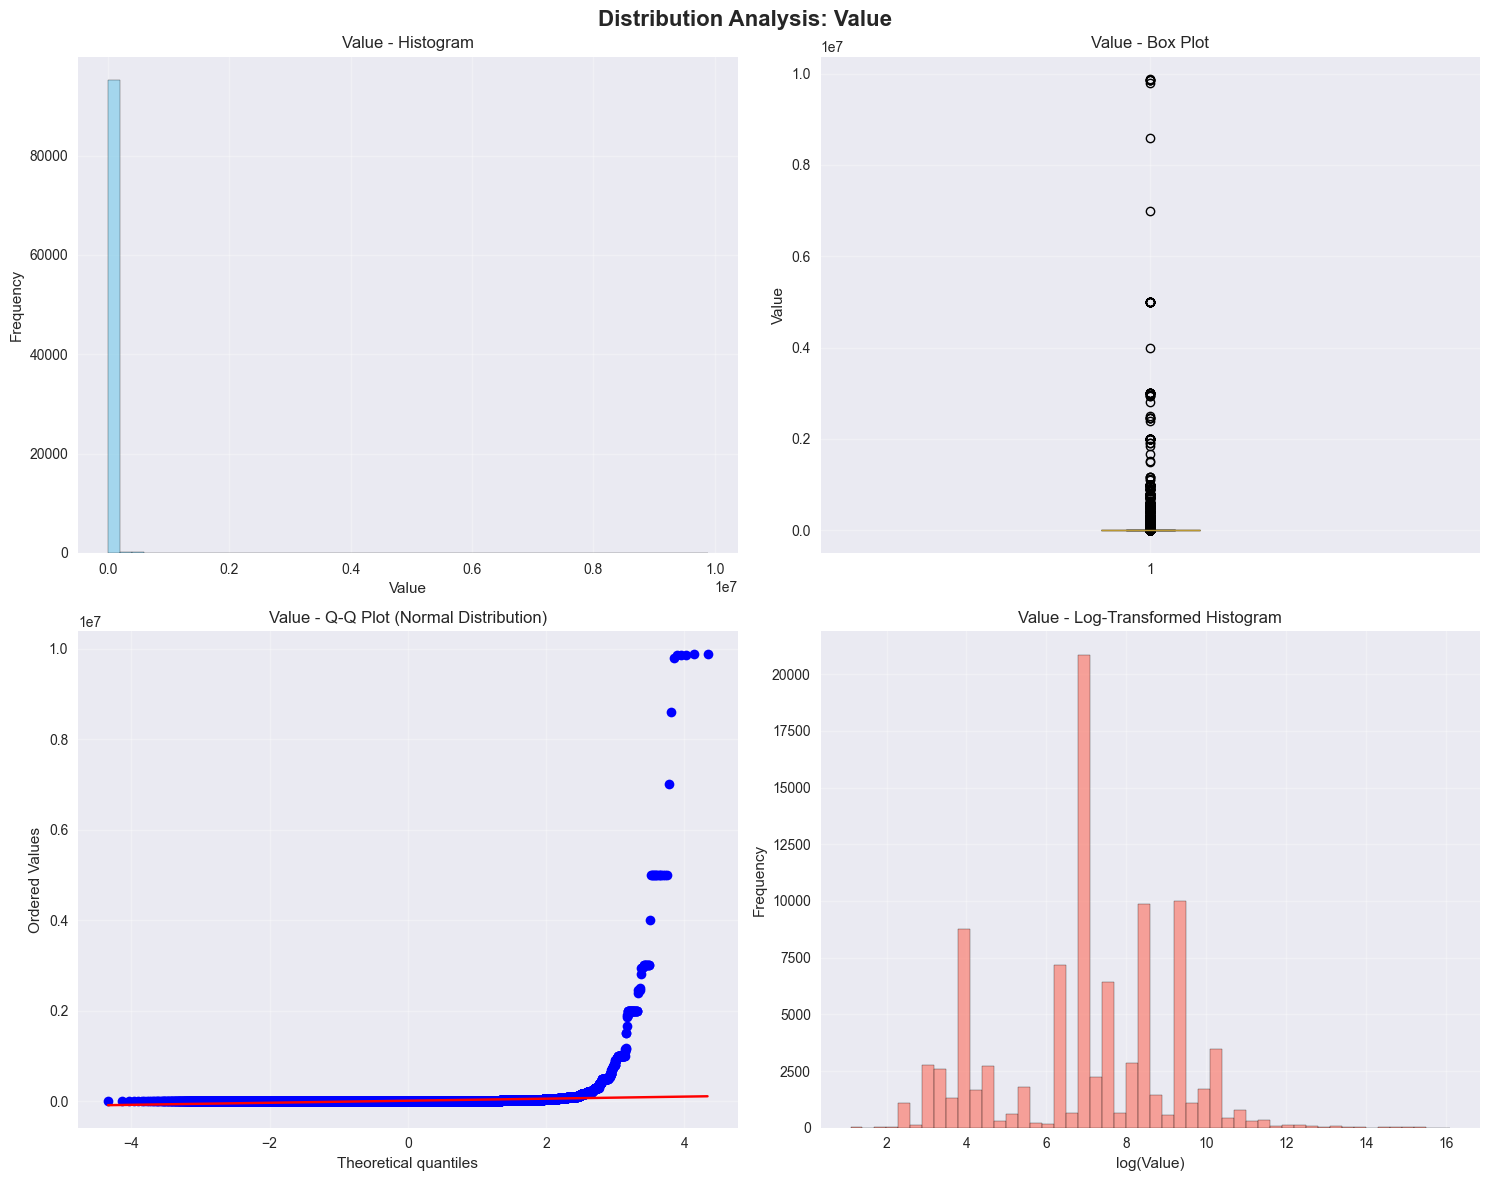

In [8]:
numerical_distribution= eda.numerical_distribution_plots()

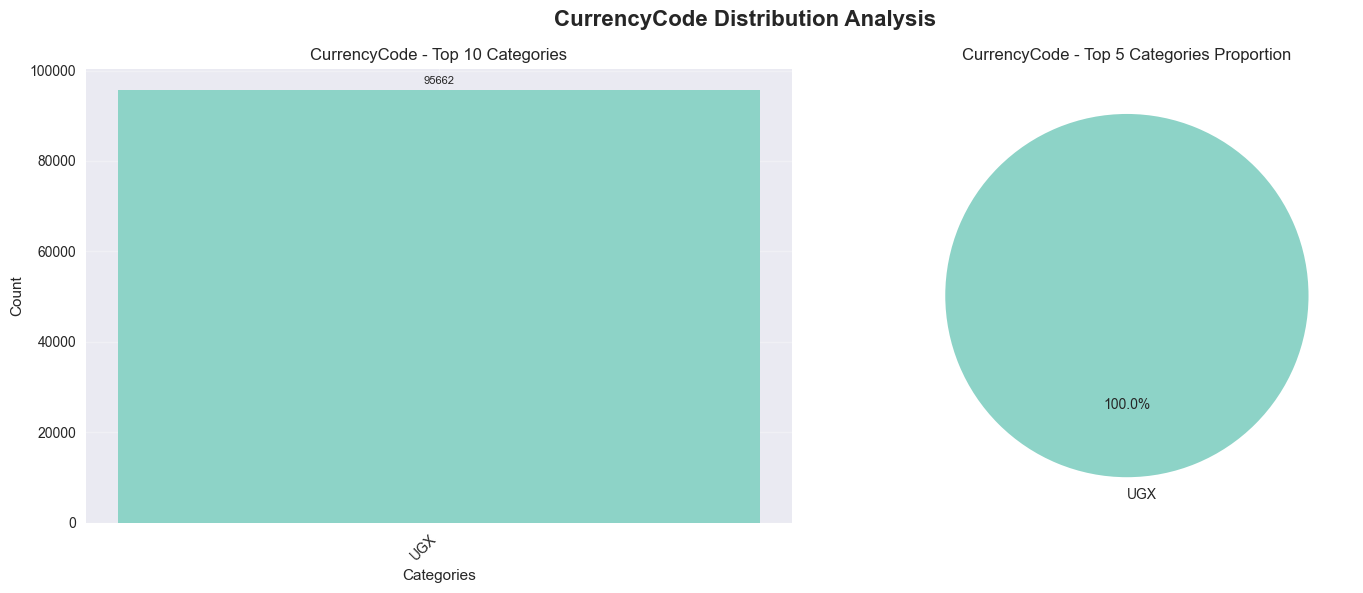

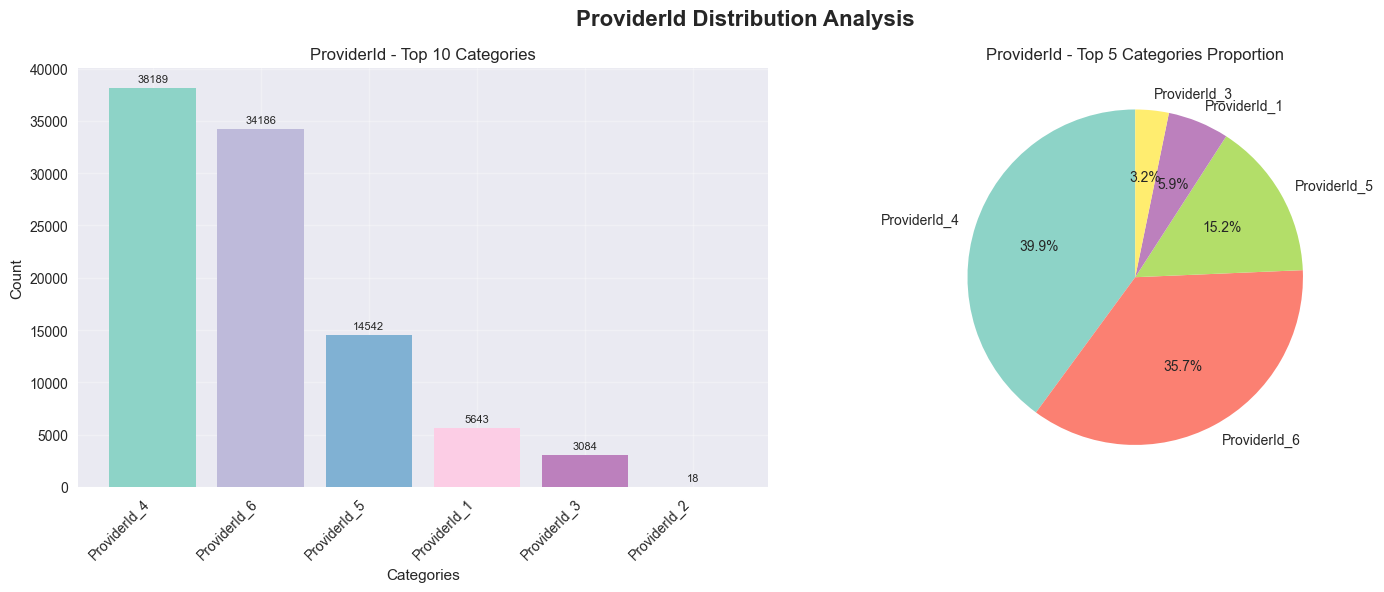

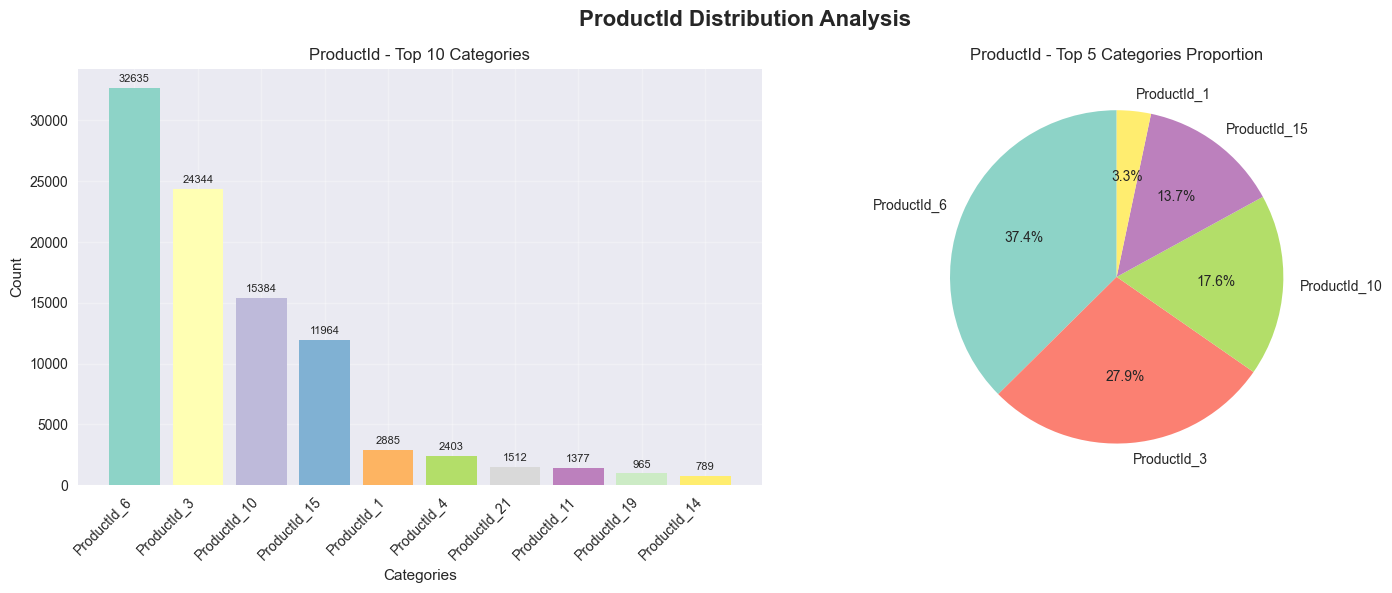

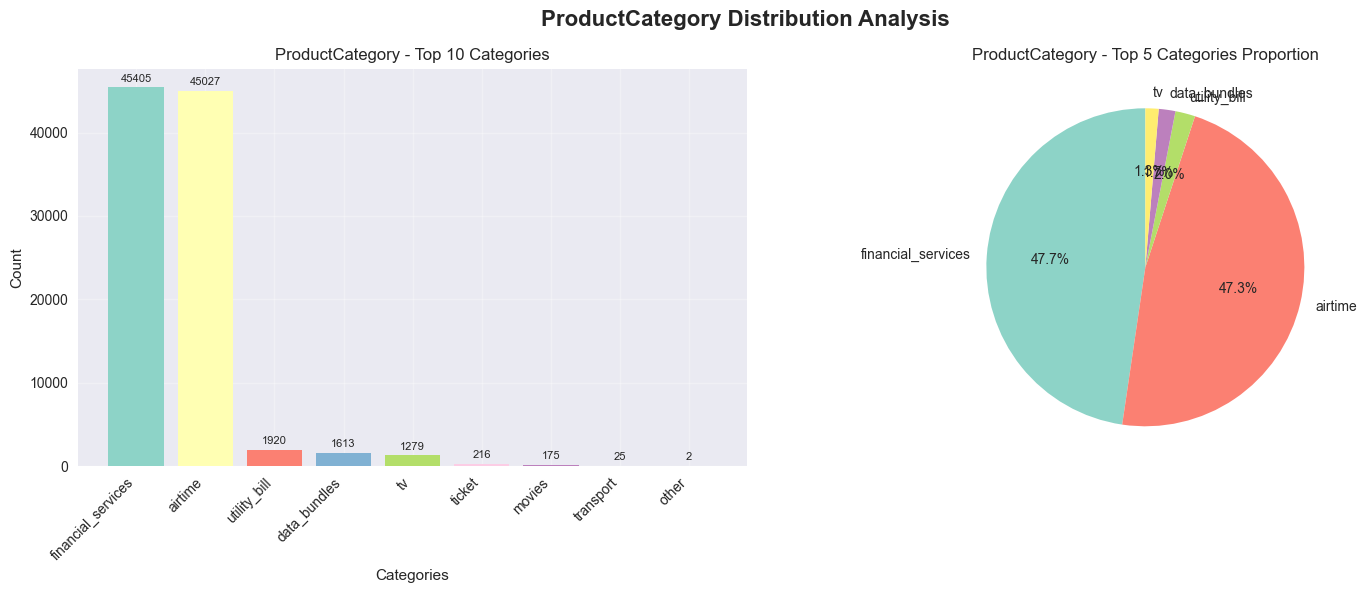

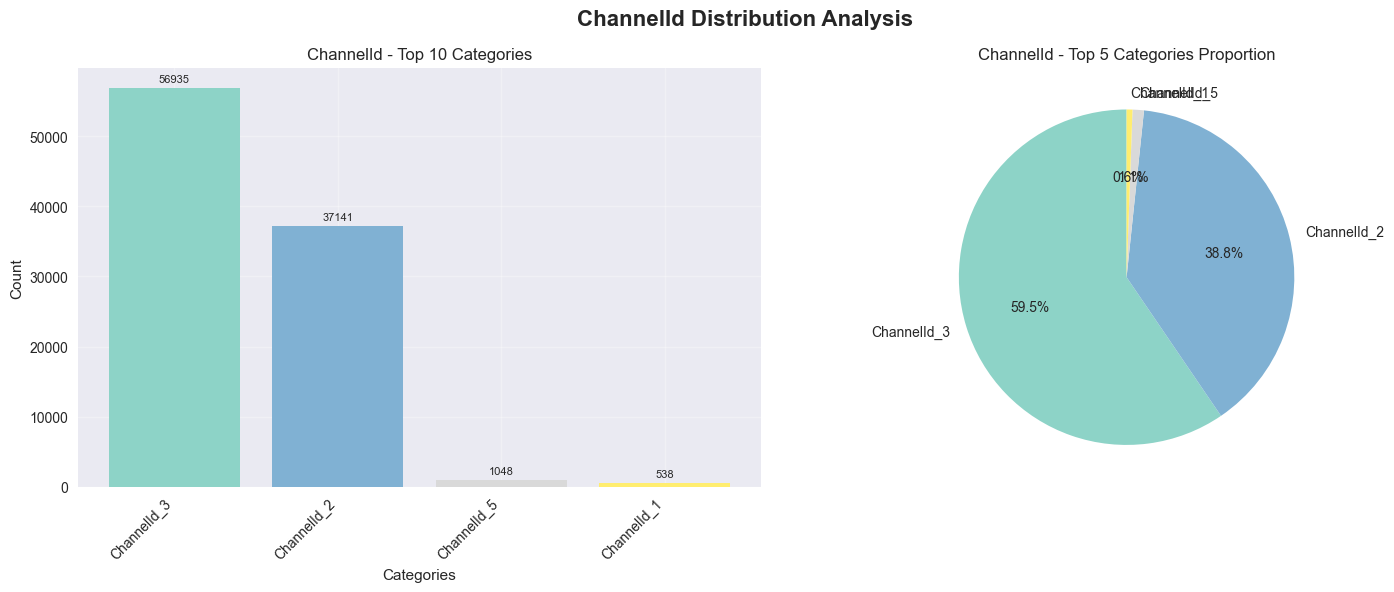

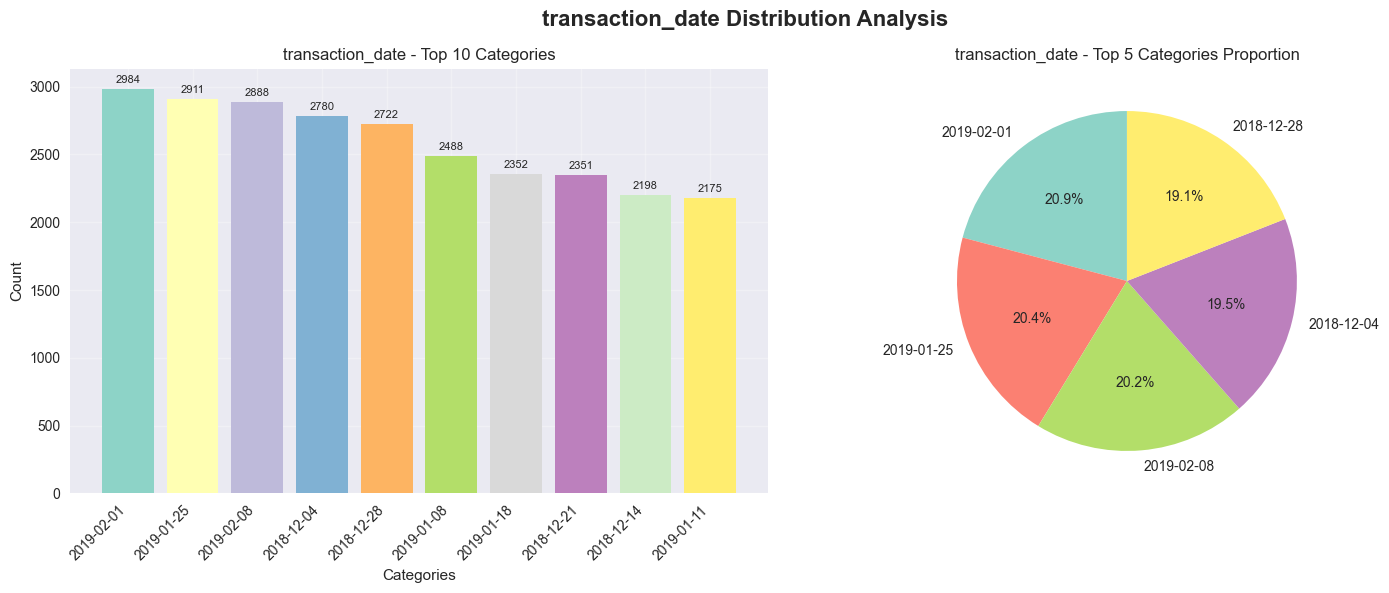

In [9]:
categorical_distribution= eda.categorical_distribution_plots()

In [11]:
correlation_analysis= eda.correlation_analysis()
print(correlation_analysis) 


### 5. Correlation Analysis (Numerical Features)
  - Correlation Matrix:
                 CountryCode    Amount     Value  PricingStrategy  FraudResult
CountryCode              NaN       NaN       NaN              NaN          NaN
Amount                   NaN  1.000000  0.989692        -0.061931     0.557370
Value                    NaN  0.989692  1.000000        -0.017020     0.566739
PricingStrategy          NaN -0.061931 -0.017020         1.000000    -0.033821
FraudResult              NaN  0.557370  0.566739        -0.033821     1.000000
  - Key Observations:
    - Strong positive correlation between 'Amount' (absolute magnitude) and 'Value'.
    - 'FraudResult' correlations with other numerical features might be weak due to its imbalance, but large magnitudes in 'Amount'/'Value' could be indicative.
    - 📊 **Visualization**: See `correlation_heatmap.png` for correlation heatmap.



In [12]:
missing_values= eda.identify_missing_values()
print(missing_values)


### 6. Identifying Missing Values
  - No missing values found in the dataset.



In [15]:
outliers= eda.detect_outliers()
print(outliers)


### 7. Outlier Detection (Numerical Features) - Z-Score Method
  - **Amount**:
    - Mean: 6717.85
    - Standard Deviation: 123306.80
    - Number of Outliers (|Z-score| > 3): 269
    - Percentage of Outliers: 0.28%
    - Outlier Range: -1000000.00 to 9880000.00
    - Max Z-score: 80.07
    - Observations: Z-score method identifies extreme values that deviate significantly from the mean. High Z-scores may indicate potential fraud, data entry errors, or legitimate large transactions.
    - 📊 **Visualization**: See `Amount_outlier_analysis.png` for detailed outlier analysis.
  - **Value**:
    - Mean: 9900.58
    - Standard Deviation: 123122.09
    - Number of Outliers (|Z-score| > 3): 269
    - Percentage of Outliers: 0.28%
    - Outlier Range: 380000.00 to 9880000.00
    - Max Z-score: 80.17
    - Observations: Z-score method identifies extreme values that deviate significantly from the mean. High Z-scores may indicate potential fraud, data entry errors, or legitimate large transacti

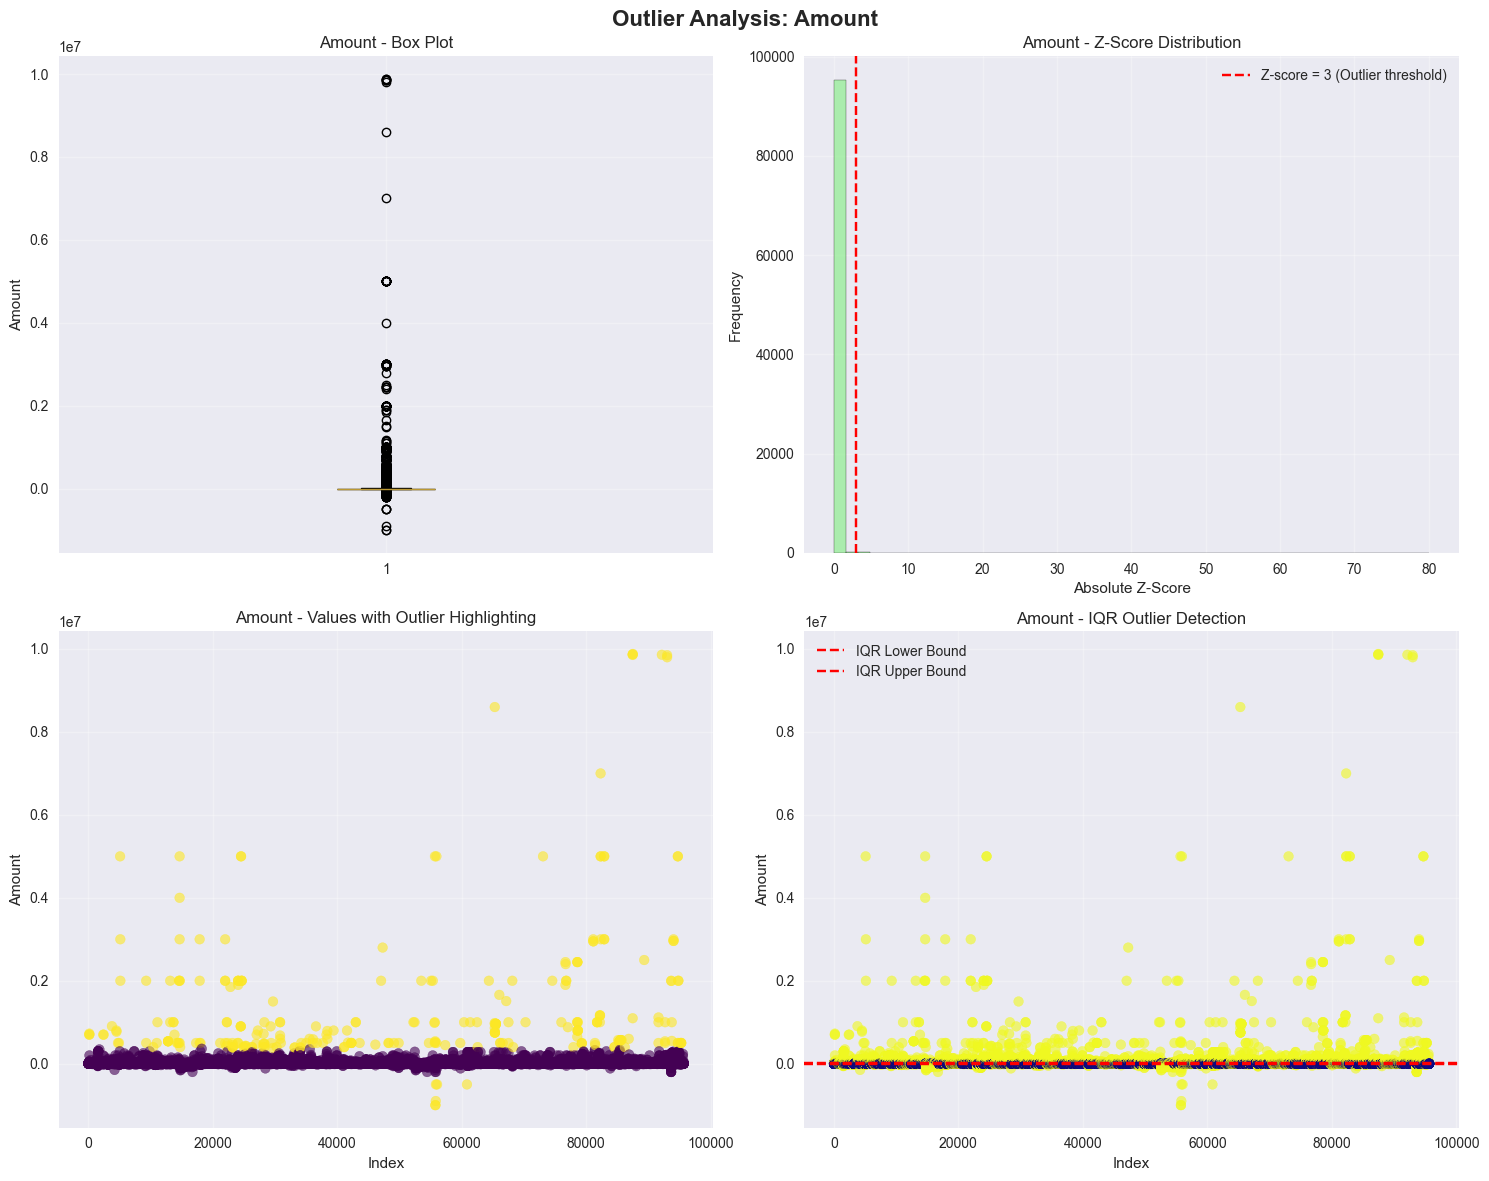

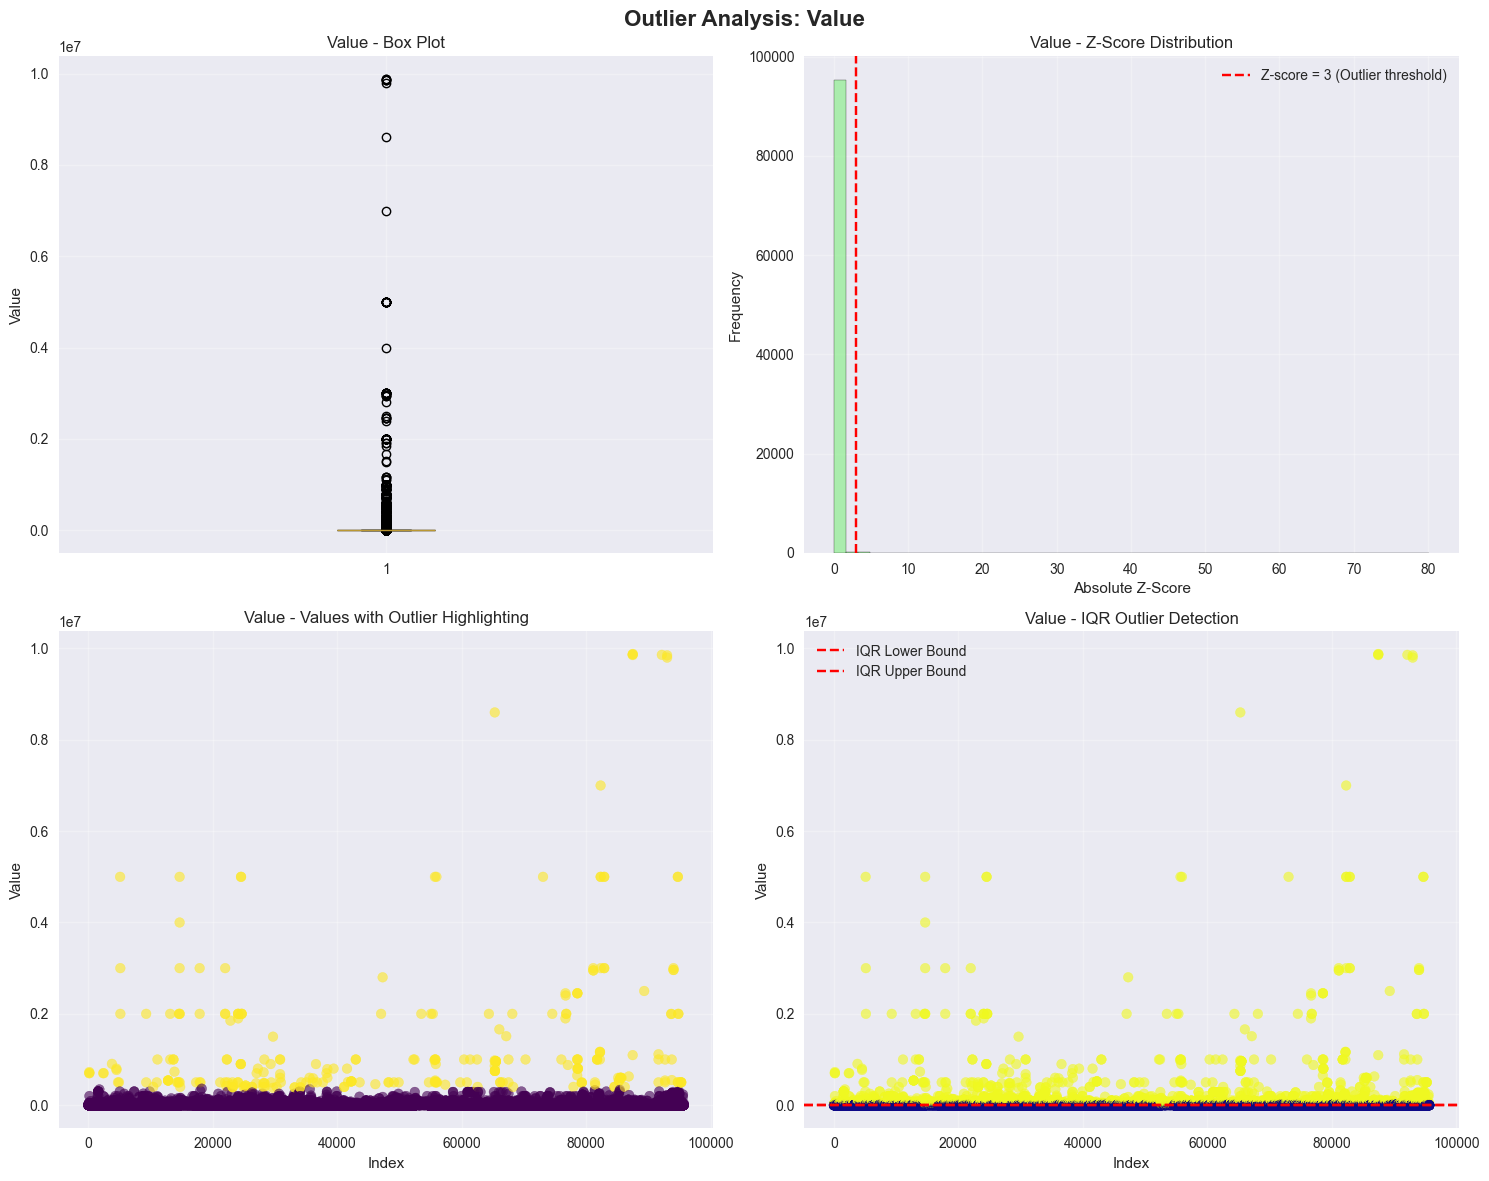

In [16]:
outliers_plot= eda.outlier_analysis_plots()

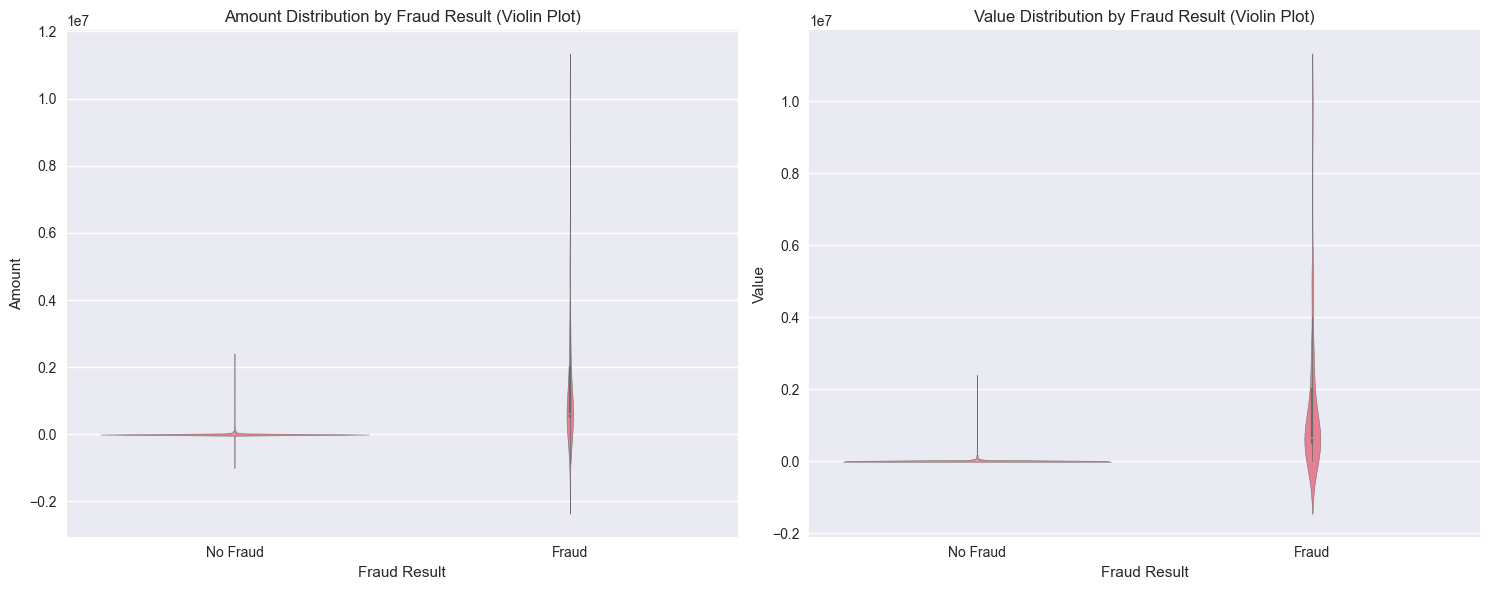

In [18]:
fraud_analysis= eda.fraud_analysis_plots()


In [17]:
# Remove outliers from all numerical columns with default threshold
processor.remove_outliers_zscore()

Removing outliers with Z-score > 3...
  - Amount: 269 outliers removed
  - Value: 269 outliers removed
  - PricingStrategy: 385 outliers removed
  - FraudResult: 193 outliers removed
Outlier removal completed:
  - Initial rows: 95662
  - Final rows: 95044
  - Rows removed: 618
  - Percentage removed: 0.65%


True

In [19]:
# Clean data (remove outliers with Z-score > 3) and save to CSV
processor.clean_and_save_data("cleaned-data.csv")

=== Data Cleaning and Saving Pipeline ===

1. Removing outliers (Z-score > 3)...
Removing outliers with Z-score > 3...
  - Amount: 1571 outliers removed
  - Value: 1109 outliers removed
Outlier removal completed:
  - Initial rows: 95044
  - Final rows: 93469
  - Rows removed: 1575
  - Percentage removed: 1.66%

2. Saving cleaned data to e:\AI\Week-5\Week 5 Project\credit-risk-model\data\processed\cleaned-data.csv...
✅ Successfully saved cleaned data!
📊 Final dataset shape: (93469, 17)
💾 File saved at: e:\AI\Week-5\Week 5 Project\credit-risk-model\data\processed\cleaned-data.csv

📈 Dataset Summary:
   - Total rows: 93469
   - Total columns: 17
   - Fraud cases: 0 (0.0000)


True